### Library 

In [250]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error
from sklearn.manifold import TSNE

### Load and shape data 

In [251]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [252]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [253]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [254]:
# Change ganularity ?
name_granu = '30m'
data_conso_df = change_granularity(data_conso_df, granularity="30min")

In [255]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [256]:
# Split train and test
#date_test_start = datetime.date(2014,1,1)
#date_test_end = datetime.date(2015,1,1)
#dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

dict_xconso = {'train': x_conso}

In [257]:
# Normalize x_conso
type_scaler = 's'
dict_xconso, _ = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [269]:
name_type_cond = 'm-wd'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday']

In [270]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

In [271]:
dataset['train']['x'][0].shape

(1830, 48)

### Build model

In [272]:
path_out = os.path.join(path_main_folder, 'out')

In [280]:
# Parameters
cond_dim = dataset['train']['x'][1].shape[1]
e_dims=[48,24,12]
d_dims=[12,24,48]
input_dim = 48
z_dim= 4
beta = 0.04

In [281]:
name_model = 'thesis_cvae_conso_e48-24-12_d12-24-48_gran-{}_x-{}_cond-{}'.format(name_granu,name_type_x, name_type_cond)
#name_model = 'cvae_classification'

In [282]:
name_model

'thesis_cvae_conso_e48-24-12_d12-24-48_gran-30m_x-c_cond-m-wd'

In [283]:
model = CVAE(input_dim=input_dim,
             cond_dim=cond_dim, 
             e_dims=e_dims, 
             d_dims=d_dims, 
             z_dim=z_dim, 
             beta=beta,
             name=name_model, 
             output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 48)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 4), (None, 4 4604        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               (None, 4)            0           encoder[1][0]              

### Trainning model 

In [ ]:
model.load_model("/home/antorosi/Documents/AutoEncoder/out/thesis_cvae_conso_e48-24-12_d12-24-48_gran-30m_x-c-temp_cond-m-wd/models/model1-0.75")



--- START TRAINING ---

Epoch 1/150
1830/1830 [==============================] - 0s 237us/step - loss: 21.1368 - kl_loss: 24.4925 - recon_loss: 20.1571
Epoch 2/150
1830/1830 [==============================] - 0s 65us/step - loss: 3.3975 - kl_loss: 22.1638 - recon_loss: 2.5109
Epoch 3/150
1830/1830 [==============================] - 0s 63us/step - loss: 2.2083 - kl_loss: 16.8992 - recon_loss: 1.5323
Epoch 4/150
1830/1830 [==============================] - 0s 63us/step - loss: 1.8395 - kl_loss: 14.4695 - recon_loss: 1.2607
Epoch 5/150
1830/1830 [==============================] - 0s 62us/step - loss: 1.6060 - kl_loss: 13.0761 - recon_loss: 1.0829
Epoch 6/150
1830/1830 [==============================] - 0s 67us/step - loss: 1.4765 - kl_loss: 12.4323 - recon_loss: 0.9792
Epoch 7/150
1830/1830 [==============================] - 0s 66us/step - loss: 1.3722 - kl_loss: 11.7224 - recon_loss: 0.9033
Epoch 8/150
1830/1830 [==============================] - 0s 68us/step - loss: 1.2746 - kl_loss: 

1830/1830 [==============================] - 0s 65us/step - loss: 0.6096 - kl_loss: 6.6593 - recon_loss: 0.3432
Epoch 67/150
1830/1830 [==============================] - 0s 67us/step - loss: 0.6004 - kl_loss: 6.5043 - recon_loss: 0.3402
Epoch 68/150
1830/1830 [==============================] - 0s 70us/step - loss: 0.6094 - kl_loss: 6.6067 - recon_loss: 0.3452
Epoch 69/150
1830/1830 [==============================] - 0s 68us/step - loss: 0.6048 - kl_loss: 6.5054 - recon_loss: 0.3446
Epoch 70/150
1830/1830 [==============================] - 0s 65us/step - loss: 0.6021 - kl_loss: 6.4213 - recon_loss: 0.3452
Epoch 71/150
1830/1830 [==============================] - 0s 67us/step - loss: 0.6009 - kl_loss: 6.4977 - recon_loss: 0.3410
Epoch 72/150
1830/1830 [==============================] - 0s 65us/step - loss: 0.5862 - kl_loss: 6.3416 - recon_loss: 0.3325
Epoch 73/150
1830/1830 [==============================] - 0s 74us/step - loss: 0.5879 - kl_loss: 6.3549 - recon_loss: 0.3337
Epoch 74/150


1830/1830 [==============================] - 0s 68us/step - loss: 0.4636 - kl_loss: 4.9031 - recon_loss: 0.2675
Epoch 132/150
1830/1830 [==============================] - 0s 68us/step - loss: 0.4654 - kl_loss: 4.8524 - recon_loss: 0.2713
Epoch 133/150
1830/1830 [==============================] - 0s 67us/step - loss: 0.4612 - kl_loss: 4.8375 - recon_loss: 0.2677
Epoch 134/150
1830/1830 [==============================] - 0s 70us/step - loss: 0.4669 - kl_loss: 4.8279 - recon_loss: 0.2738
Epoch 135/150
1830/1830 [==============================] - 0s 65us/step - loss: 0.4604 - kl_loss: 4.8346 - recon_loss: 0.2670
Epoch 136/150
1830/1830 [==============================] - 0s 68us/step - loss: 0.4591 - kl_loss: 4.8232 - recon_loss: 0.2662
Epoch 137/150
1830/1830 [==============================] - 0s 69us/step - loss: 0.4682 - kl_loss: 4.8374 - recon_loss: 0.2747
Epoch 138/150
1830/1830 [==============================] - 0s 72us/step - loss: 0.4653 - kl_loss: 4.8599 - recon_loss: 0.2709
Epoch 

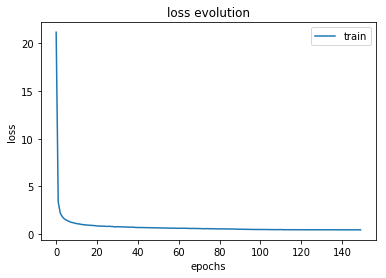

In [284]:
model.main_train(dataset, training_epochs=150, batch_size=20, verbose=False)

In [480]:
with open(os.path.join(path_out,name_model,"config.txt"),'w') as file: 
    file.write(str(cond_dim) + '\n') 
    file.write(str(e_dims) + '\n') 
    file.write(str(d_dims) + '\n') 
    file.write(str(z_dim) + '\n')
    file.write(str(beta) + '\n')

## Loading model 

In [98]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the latent space

In [285]:
name_set_plot = 'train'
version = '-v4'

In [286]:
x_encoded = model.encoder.predict(dataset[name_set_plot]['x'])[0]

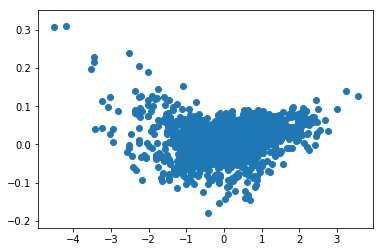

In [287]:
plt.scatter(x_encoded[:,0], x_encoded[:,1])

In [288]:
# t-sne if latent space more than 2 dimension
x_encoded = TSNE(n_components=2).fit_transform(x_encoded)

In [289]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

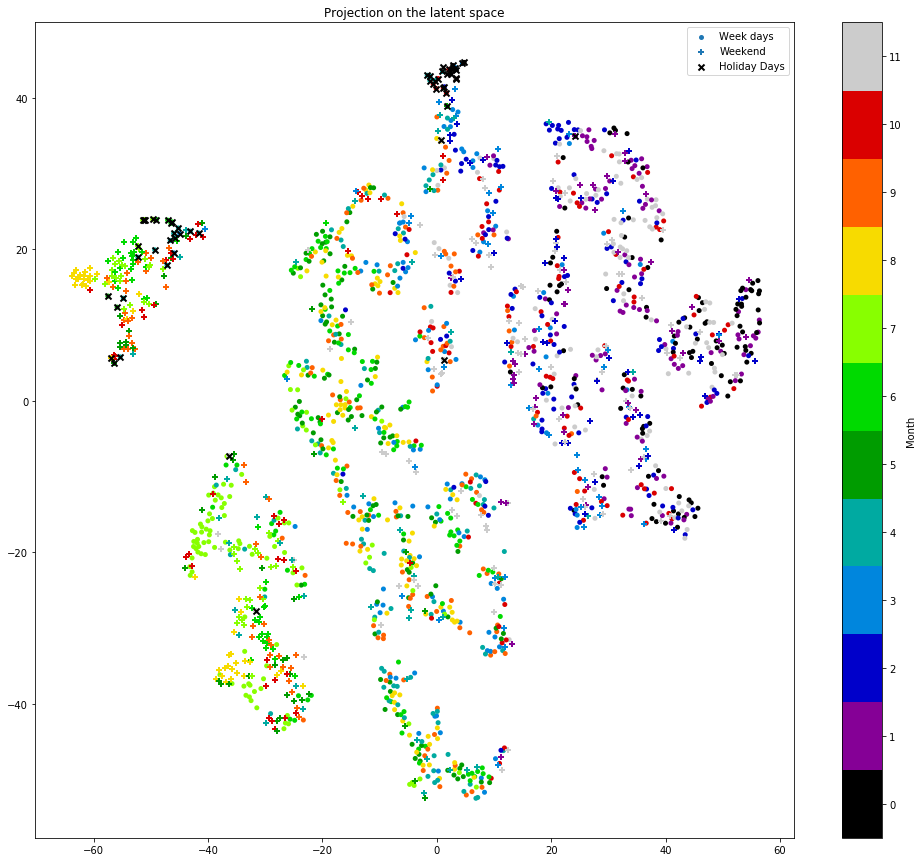

In [290]:
name_plot = 'z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [293]:
temp = get_cond_autoencoder(dataset['train']['x'],dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

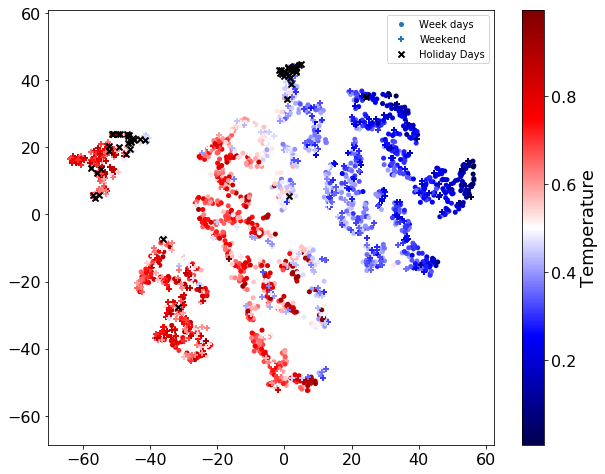

In [294]:
name_plot = 'temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

### Analyse of the reconstruction error

In [301]:
[x, cond] = dataset['train']['x']
x_hat = model.cvae.predict(x=[x, cond])

In [302]:
res_mat = (x - x_hat)
res = res_mat.mean(axis=1)

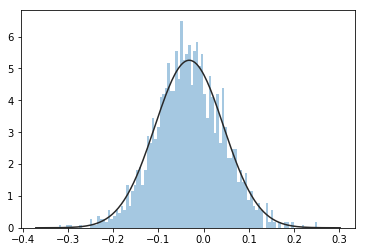

In [303]:
sn.distplot(res, kde=False, fit=stats.norm, bins=100)

In [304]:
res_conso_mat = res_mat[:,:48]
res_temp_mat = res_mat[:,48:]

In [305]:
res_conso = res_conso_mat.mean(axis=1)
res_temp = res_temp_mat.mean(axis=1)

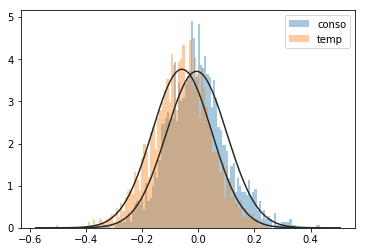

In [306]:
sn.distplot(res_conso, kde=False, fit=stats.norm, bins=100, label='conso')
sn.distplot(res_temp, kde=False, fit=stats.norm, bins=100, label='temp')
plt.legend()

In [307]:
results = dict()
results['me'] = {'all': res, 'temp': res_temp, 'conso': res_conso}

In [308]:
results['mae'] = {
    'all': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_mat),
    'conso': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_conso_mat),
    'temp': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_temp_mat)
}

In [309]:
results['z_score'] = {}
results['a_score'] = {}

for key, me in results['me'].items():
    z_score = stats.zscore(me)
    a_score = 1-2 * stats.norm.cdf(-np.abs(z_score))
    
    results['z_score'][key] = z_score
    results['a_score'][key] = a_score

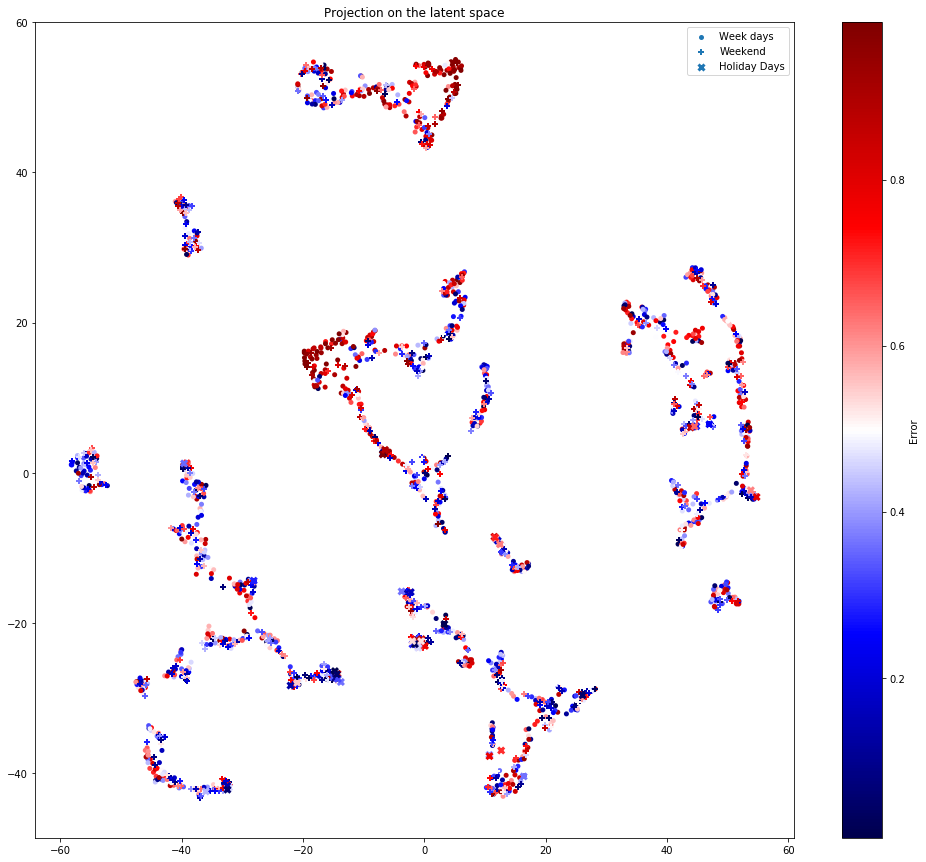

In [539]:
type_error = 'a_score'
type_data = 'all'

name_plot = '{}-{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(type_error, type_data,str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
path_plot = os.path.join(path_out,name_model,'results')

error = results[type_error][type_data]
pyplot_latent_space_projection_error(x_encoded, calendar_info, error, color='seismic', path_folder_out=path_plot, name=name_plot)

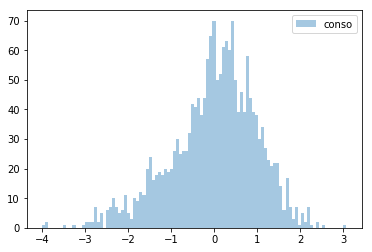

In [91]:
sn.distplot(results['z_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

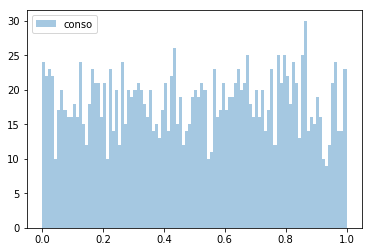

In [146]:
sn.distplot(results['a_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

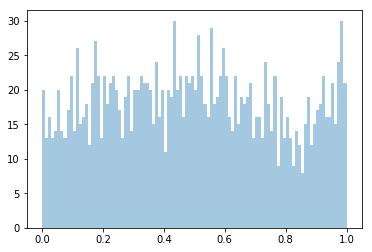

In [228]:
sn.distplot(stats.norm.cdf(results['z_score']['conso']), kde=False, bins=100, label='conso')

In [194]:
indice = 200

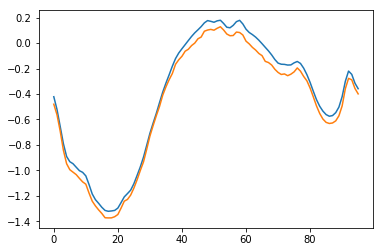

In [195]:
plt.plot(x[indice,])
plt.plot(x_hat[indice,])

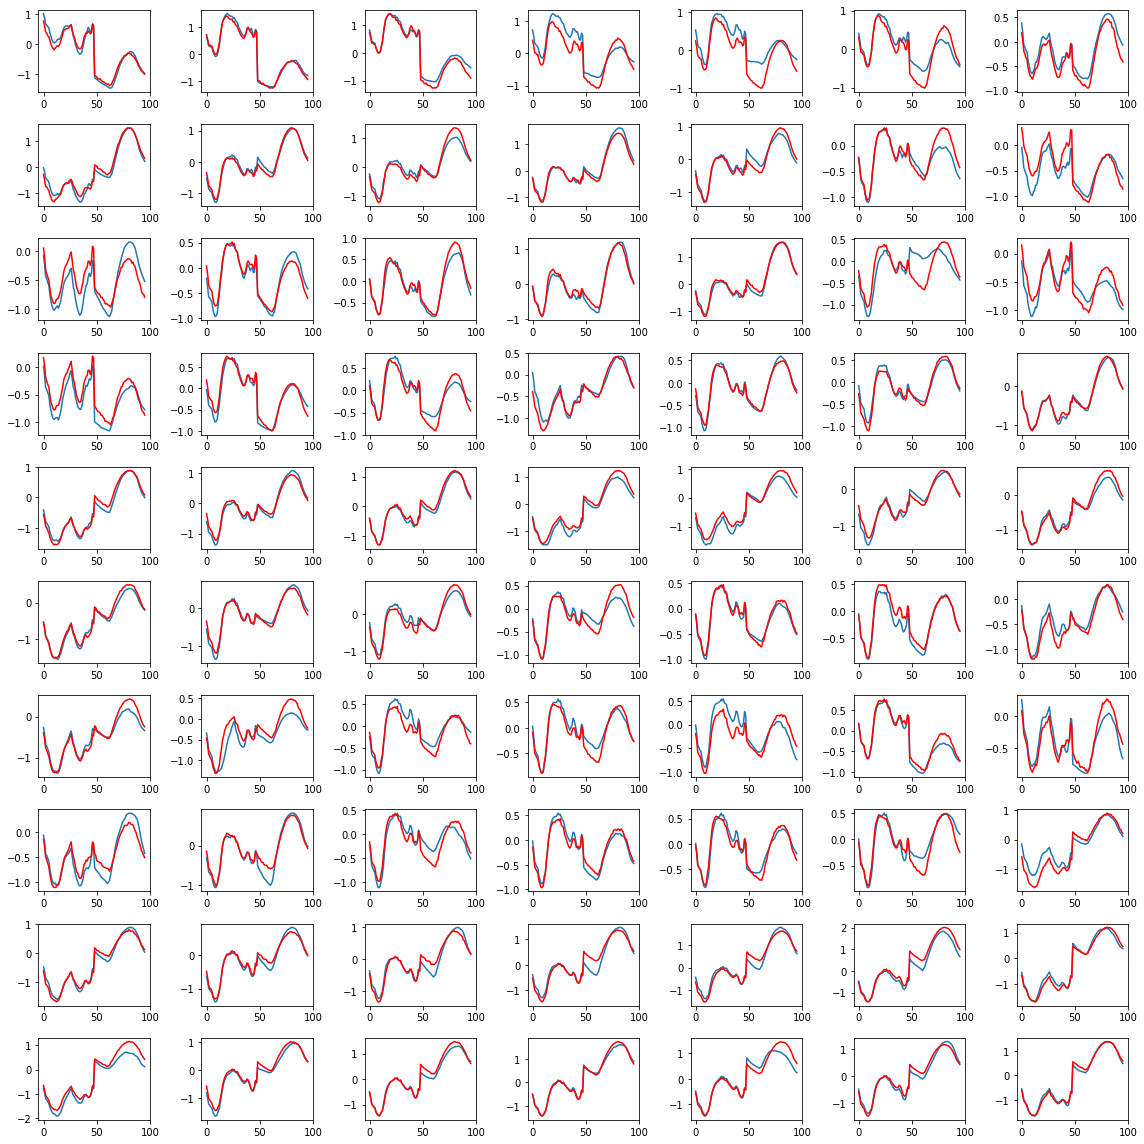

In [310]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 100

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(x[ind,:])
        ax.plot(x_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

In [228]:
model.history.keys()

dict_keys(['kl_loss', 'loss', 'recon_loss'])

In [229]:
el = model.history


In [231]:
el['kl_loss'][-1]

1.3353316627564977

In [85]:
path_out

'/home/antorosi/Documents/AutoEncoder/out'

In [606]:
l = [3,2,1]

In [608]:
l[:-1]

[3, 2]

In [609]:
l = [3]

In [221]:
def pyplot_simple_latent_space_projection(x_proj, calendar_info, path_folder_out, name=None, size_fig=(10,8)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: nipy_spectral, plasma, viridis

    month = np.array(calendar_info.month)

    mask_isweekday = False
    mask_ishd = False

    fig, ax = plt.subplots(figsize=size_fig)
    circle = plt.Circle((0, 0), 1.96, fill=0) 
    ax.add_artist(circle)
    ax.tick_params(axis='both', labelsize=16)

    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c=month[mask_isweekday], cmap=plt.cm.get_cmap('nipy_spectral', 12), label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c=month[np.invert(mask_isweekday)], cmap=plt.cm.get_cmap('nipy_spectral', 12), label='Weekend')
        print('week_day')
        
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=month, cmap=plt.cm.get_cmap('nipy_spectral', 12))
        print('normal')


    cbar = plt.colorbar(ticks=range(0, 12), label='Month')
    cbar.ax.tick_params(labelsize=16) 
    cbar.ax.yaxis.label.set_fontsize(18)    
    
    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='s', lw=2,
                c='black', label='Holiday Days')
        
    plt.clim(-0.5, 11.5)
    plt.axis('equal')

    plt.legend()

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()

In [66]:
def pyplot_week_latent_space_projection(x_proj, calendar_info, path_folder_out, name=None, size_fig=(10,8)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: nipy_spectral, plasma, viridis


    mask_isweekday = False
    mask_ishd = False

    fig, ax = plt.subplots(figsize=size_fig)
    circle = plt.Circle((0, 0), 1.96, fill=0) 
    ax.add_artist(circle)
    ax.tick_params(axis='both', labelsize=16)

    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c="C2", label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c="C3",label='Weekend')
        print('week_day')
        
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=month, cmap=plt.cm.get_cmap('nipy_spectral', 12))
        print('normal')


    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='x', lw=2,
                c='black', label='Holiday Days')
   
    plt.axis('equal')

    plt.legend(fontsize = 'xx-large')

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()

In [265]:
def pyplot_latent_space_projection_temp(x_proj, calendar_info, temp, path_folder_out=None, name=None,size_fig=(10,8)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: seismic

    mask_isweekday = False
    mask_ishd = False
    
    fig, ax = plt.subplots(figsize=size_fig)
    #circle = plt.Circle((0, 0), 1.96, fill=0) 
    #ax.add_artist(circle)
    #ax.add_artist(circle)
    ax.tick_params(axis='both', labelsize=16)

 
    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c=temp[mask_isweekday], cmap=plt.cm.get_cmap('seismic'), label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c=temp[np.invert(mask_isweekday)], cmap=plt.cm.get_cmap('seismic'), label='Weekend')
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=temp, cmap=plt.cm.get_cmap('seismic'))
        
    cbar=plt.colorbar(label='Temperature')
    #plt.clim(-0.5, 11.5)
    plt.axis('equal')
    cbar.ax.tick_params(labelsize=16) 
    cbar.ax.yaxis.label.set_fontsize(18)

        

    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='x', lw=2,
                c='black', label='Holiday Days')

    
   


    plt.legend()

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()


In [297]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
#calendar_info['weekday'] = calendar_info.ds.dt.weekday
#calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

In [244]:
name_plot = 'z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
path_folder_out = os.path.join(path_out,name_model,'results')

In [245]:
name_plot = 'month_hd_z2_nice_beta{}'.format(beta)
#path_folder_out = 

No handles with labels found to put in legend.


normal


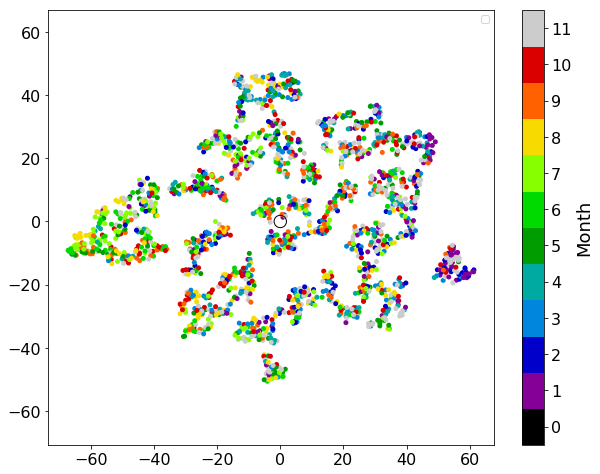

In [246]:
pyplot_simple_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=path_folder_out, name=name_plot)

In [266]:
temp = get_cond_autoencoder(dataset['train']['x'],dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

In [298]:
name_plot = 'temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
name_plot = "temp_z4_cvae_wt_TSNE"                                                                    

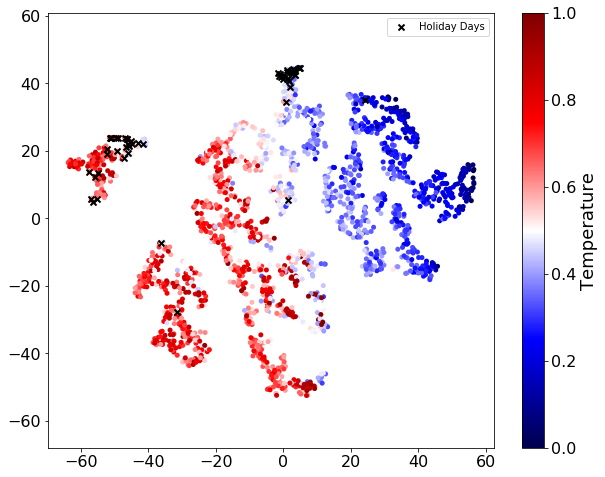

In [299]:
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

In [72]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
#calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
#calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

In [73]:
name_plot = "week_z2_nice"                                                                    

week_day


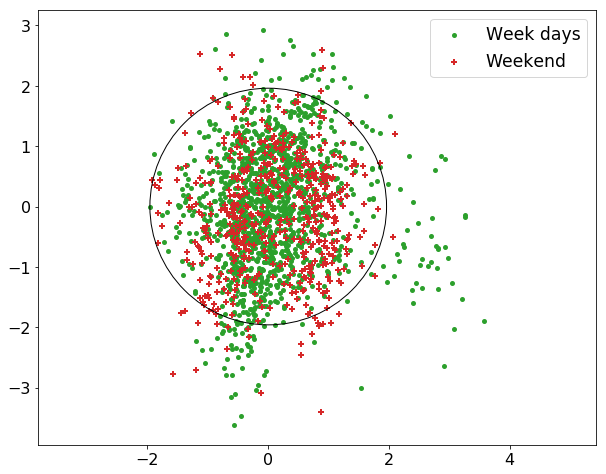

In [74]:
pyplot_week_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=path_folder_out, name=name_plot)